# Name: Sravya Koyi
# ZID: Z1989016

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import load_svmlight_file
from sklearn.metrics import accuracy_score

# Load the dataset
all_X, all_Y = load_svmlight_file("/content/drive/MyDrive/code/sonar_scale.txt")

# Load train and test indices
train_indices = -1 + np.loadtxt("/content/drive/MyDrive/code/sonar-scale-train-indices.txt", dtype=int)
test_indices = -1 + np.loadtxt("/content/drive/MyDrive/code/sonar-scale-test-indices.txt", dtype=int)

# Split the data into training and testing sets
X_train, y_train = all_X[train_indices], all_Y[train_indices]
X_test, y_test = all_X[test_indices], all_Y[test_indices]

# Define candidate C values for GridSearch
C_values = [0.01, 0.1, 1, 10, 100, 1000]
kernels = ['linear', 'poly', 'rbf']
results = {}

for kernel in kernels:
    print(f"\nTraining SVM with {kernel} kernel...")

    # Define the SVC model and GridSearch
    svc = SVC(kernel=kernel)
    clf = GridSearchCV(svc, {'C': C_values}, cv=5, error_score='raise')  # Error score set to raise for debugging

    try:
        # Fit model
        clf.fit(X_train, y_train)

        # Get best C and train final model
        best_C = clf.best_params_['C']
        print(f"Best C for {kernel} kernel: {best_C}")

        final_model = SVC(kernel=kernel, C=best_C)
        final_model.fit(X_train, y_train)

        # Predict and calculate accuracy
        y_pred = final_model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)

        # Store results
        results[kernel] = (accuracy, best_C)
        print(f"SVM with {kernel} kernel -- Accuracy: {accuracy:.2f}")

    except ValueError as e:
        print(f"Error with {kernel} kernel: {e}")

# Output the best kernel, C, and accuracy results
best_kernel = max(results, key=lambda k: results[k][0])
print("\nBest kernel:", best_kernel)
print("Best C:", results[best_kernel][1])
print("Accuracies:", {k: v[0] for k, v in results.items()})


Training SVM with linear kernel...
Best C for linear kernel: 0.01
SVM with linear kernel -- Accuracy: 0.69

Training SVM with poly kernel...
Best C for poly kernel: 1
SVM with poly kernel -- Accuracy: 0.88

Training SVM with rbf kernel...
Best C for rbf kernel: 10
SVM with rbf kernel -- Accuracy: 0.93

Best kernel: rbf
Best C: 10
Accuracies: {'linear': 0.6896551724137931, 'poly': 0.8793103448275862, 'rbf': 0.9310344827586207}


Loading data...
Training data shape: (5230, 54)
Test data shape: (5810, 54)

Processing Raw data...
Testing C=0.01...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=0.1...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=100...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Best C value for Raw: 0.01


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Processing Rescaled data...
Testing C=0.01...
Testing C=0.1...
Testing C=1...
Testing C=10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=100...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Best C value for Rescaled: 1


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Processing Mean Normalized data...
Testing C=0.01...
Testing C=0.1...
Testing C=1...
Testing C=10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=100...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Best C value for Mean Normalized: 10


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(



Processing Standardized data...
Testing C=0.01...
Testing C=0.1...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=10...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=100...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Testing C=1000...


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=5000).  Consider

Best C value for Standardized: 0.01


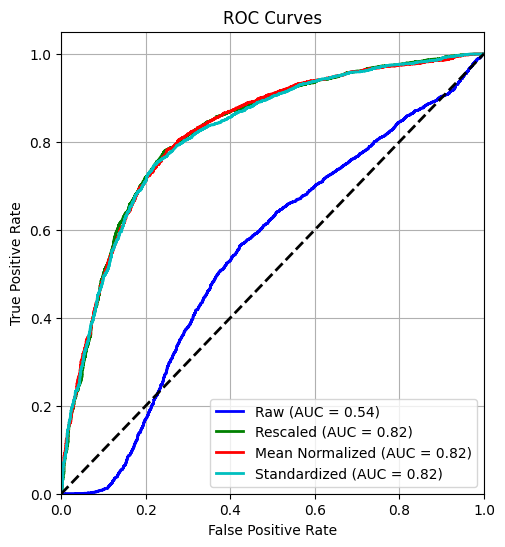

In [25]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt

def rescale_features(X):
    """Rescale features to [0,1] range"""
    X_rescaled = np.zeros_like(X)
    for j in range(X.shape[1]):
        min_val = np.min(X[:, j])
        max_val = np.max(X[:, j])
        if max_val - min_val != 0:
            X_rescaled[:, j] = (X[:, j] - min_val) / (max_val - min_val)
        else:
            X_rescaled[:, j] = X[:, j]
    return X_rescaled

def mean_normalization(X):
    """Apply mean normalization"""
    X_normalized = np.zeros_like(X)
    for j in range(X.shape[1]):
        min_val = np.min(X[:, j])
        max_val = np.max(X[:, j])
        mean_val = np.mean(X[:, j])
        if max_val - min_val != 0:
            X_normalized[:, j] = (X[:, j] - mean_val) / (max_val - min_val)
        else:
            X_normalized[:, j] = X[:, j]
    return X_normalized

def standardization(X):
    """Standardize features"""
    X_standardized = np.zeros_like(X)
    for j in range(X.shape[1]):
        mean_val = np.mean(X[:, j])
        std_val = np.std(X[:, j])
        if std_val != 0:
            X_standardized[:, j] = (X[:, j] - mean_val) / std_val
        else:
            X_standardized[:, j] = X[:, j]
    return X_standardized

# Load and prepare data
print("Loading data...")
data = np.loadtxt("/content/drive/MyDrive/code/covtype.data", delimiter=',')
all_X = data[:, :-1]
all_Y = data[:, -1]

train_indices = -1 + np.loadtxt("/content/drive/MyDrive/code/covtype.train.index.txt", dtype=int)
test_indices = -1 + np.loadtxt("/content/drive/MyDrive/code/covtype.test.index.txt", dtype=int)

# Use subset of data for faster processing
trainX = all_X[train_indices][0:-1:100]  # Take every 100th sample
trainY = all_Y[train_indices][0:-1:100]
testX = all_X[test_indices][0:-1:10]     # Take every 10th sample
testY = all_Y[test_indices][0:-1:10]

# Convert to binary classification
trainY = np.where(trainY == 2, 1, -1)
testY = np.where(testY == 2, 1, -1)

print(f"Training data shape: {trainX.shape}")
print(f"Test data shape: {testX.shape}")

# Prepare different versions of the data
preprocessing_methods = {
    'Raw': lambda x: x,
    'Rescaled': rescale_features,
    'Mean Normalized': mean_normalization,
    'Standardized': standardization
}

# Dictionary to store results
results = {}
C_values = [0.01, 0.1, 1, 10, 100, 1000]

# Process data and train models
for method_name, preprocess_func in preprocessing_methods.items():
    print(f"\nProcessing {method_name} data...")

    # Preprocess data
    trainX_processed = preprocess_func(trainX.copy())
    testX_processed = preprocess_func(testX.copy())

    # Find best C using cross-validation
    best_score = -1
    best_C = None

    for C in C_values:
        print(f"Testing C={C}...")
        svm = SVC(C=C, kernel='linear', max_iter=5000)
        scores = cross_val_score(svm, trainX_processed, trainY, cv=5)
        mean_score = np.mean(scores)

        if mean_score > best_score:
            best_score = mean_score
            best_C = C

    print(f"Best C value for {method_name}: {best_C}")

    # Train final model with best C
    final_model = SVC(C=best_C, kernel='linear', probability=True, max_iter=5000)
    final_model.fit(trainX_processed, trainY)

    # Make predictions
    y_pred = final_model.predict(testX_processed)
    y_prob = final_model.predict_proba(testX_processed)[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(testY, y_pred)
    f1 = f1_score(testY, y_pred, pos_label=1)
    fpr, tpr, _ = roc_curve(testY, y_prob)
    roc_auc = auc(fpr, tpr)

    results[method_name] = {
        'accuracy': accuracy,
        'f1_score': f1,
        'auc': roc_auc,
        'fpr': fpr,
        'tpr': tpr
    }

#Create plots
plt.figure(figsize=(12, 6))

# Plot 1: ROC curves
plt.subplot(1, 2, 1)
colors = ['b', 'g', 'r', 'c']
for (method_name, result), color in zip(results.items(), colors):
    plt.plot(result['fpr'], result['tpr'], color=color, lw=2,
             label=f'{method_name} (AUC = {result["auc"]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend(loc="lower right")
plt.grid(True)

In [20]:
import numpy as np
from collections import defaultdict
import math

# Load dataset and preprocess
def load_data(file_path):
    data = []
    with open(file_path, 'r') as f:
        for line in f:
            doc_id, word_id, frequency = map(int, line.split())
            data.append((doc_id - 1, word_id - 1, frequency))
    return data

def load_labels(file_path):
    return np.loadtxt(file_path, dtype=int) - 1

# Prepare word counts for each class
def prepare_word_counts(data, labels, num_classes, num_words):
    word_counts = np.zeros((num_classes, num_words), dtype=np.float64)
    doc_counts = np.zeros(num_classes, dtype=np.float64)

    for doc_id, word_id, freq in data:
        class_id = labels[doc_id]
        word_counts[class_id, word_id] += freq
        doc_counts[class_id] += freq
    return word_counts, doc_counts

# Calculate class probabilities with Laplace smoothing
def calculate_probabilities(word_counts, doc_counts, num_words):
    probabilities = (word_counts + 1) / (doc_counts[:, None] + num_words)
    return probabilities

# Calculate log probability for each class given a document
def calculate_log_likelihoods(document, probabilities, class_priors):
    log_likelihoods = np.log(class_priors)
    for word_id, freq in document.items():
        log_likelihoods += freq * np.log(probabilities[:, word_id])
    return log_likelihoods

# Naive Bayes Classifier
class NaiveBayesClassifier:
    def __init__(self, num_classes, num_words):
        self.num_classes = num_classes
        self.num_words = num_words
        self.class_priors = None
        self.probabilities = None

    def train(self, train_data, train_labels):
        word_counts, doc_counts = prepare_word_counts(train_data, train_labels, self.num_classes, self.num_words)
        total_docs = len(train_labels)
        self.class_priors = np.array([np.sum(train_labels == c) / total_docs for c in range(self.num_classes)])
        self.probabilities = calculate_probabilities(word_counts, doc_counts, self.num_words)

    def predict(self, test_data):
        predictions = []
        for document in test_data:
            log_likelihoods = calculate_log_likelihoods(document, self.probabilities, self.class_priors)
            predictions.append(np.argmax(log_likelihoods))
        return predictions

    def predict_document(self, doc):
        return np.argmax(calculate_log_likelihoods(doc, self.probabilities, self.class_priors))

# Process raw data into document format for predictions
def prepare_documents(data, num_docs):
    documents = defaultdict(lambda: defaultdict(int))
    for doc_id, word_id, frequency in data:
        documents[doc_id][word_id] += frequency
    return [dict(doc) for _, doc in sorted(documents.items())]

# Load and preprocess training and test sets
def main():
    num_classes = 20   # Define number of classes in 20Newsgroups
    num_words = 61188  # Define the total number of words in the dataset

    # Load data
    train_data = load_data("/content/drive/MyDrive/code/train.data")
    train_labels = load_labels("/content/drive/MyDrive/code/train.label")
    test_data = load_data("/content/drive/MyDrive/code/test.data")
    test_labels = load_labels("/content/drive/MyDrive/code/test.label")

    # Prepare documents for training and testing
    train_documents = prepare_documents(train_data, len(train_labels))
    test_documents = prepare_documents(test_data, len(test_labels))

    # Initialize and train Naive Bayes model
    nb_classifier = NaiveBayesClassifier(num_classes, num_words)
    nb_classifier.train(train_data, train_labels)

    # Make predictions
    predictions = [nb_classifier.predict_document(doc) for doc in test_documents]

    # Calculate accuracy
    accuracy = np.mean(np.array(predictions) == test_labels)
    print(f"Test Set Accuracy: {accuracy:.4f}")

if __name__ == "__main__":
    main()


Test Set Accuracy: 0.7811
